# Luca Miglior - Assignment 2 - Track 3


For this assignment purposes, i have implemented a simple Restricted boltzmann machine. Full code of the implementation can be found in the file `rbm.py`. The implementation of the RBM is based on the course material, as well as well known Hinton's paper [1] and 

## First part, import dataset and preparing it by binarizing data.

In [1]:
from rbm import RestrictedBoltzmannMachine as RBM
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from skimage.metrics import structural_similarity

# load the dataset
# https://keras.io/api/datasets/mnist/ (same provided on e-learning)

dataset = mnist.load_data()
X_train, y_train = dataset[0]
X_test, y_test = dataset[1]

# binarize the dataset
X_train = (X_train > 0).astype(int)
X_test = (X_test > 0).astype(int)

# flatten the dataset
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

2023-04-10 22:28:11.204979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Now, we have to train one RBM for each digit present in the MNIST dataset.

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def evaluate_rbm(rbm, X_test):
    accuracy = []
    recall = []
    ssims = []

    for i in range(len(X_test)):
        test_sample = X_test[i]
        reconstructed = rbm.reconstruct(test_sample)
     
        # sampling reconstructions
        reconstructed = reconstructed > np.random.rand(len(reconstructed))
        reconstructed = reconstructed.astype('int64')
        # computing metrics
        accuracy.append(accuracy_score(test_sample, reconstructed))
        recall.append(recall_score(test_sample, reconstructed))
        ssims.append(structural_similarity(test_sample, reconstructed, data_range=1))

        
    return np.mean(accuracy), np.mean(recall), np.mean(ssims)

In [4]:
# train one rbm for each digit in the train set
rbms = []
for i in range(10):
    print("Training RBM for digit", i)
    rbm = RBM(X_train.shape[1], 100)
    rbm.train(X_train[y_train == i], 10, 0.01)
    rbms.append(rbm)


Training RBM for digit 0


KeyboardInterrupt: 

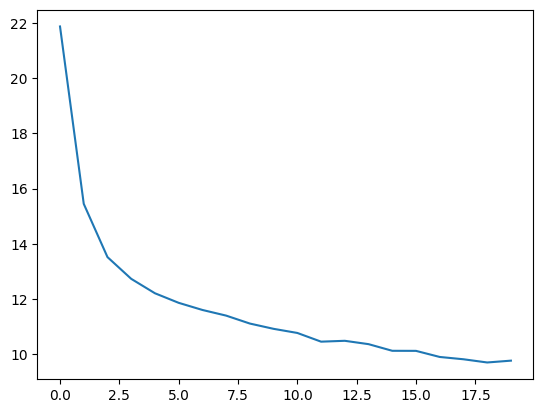

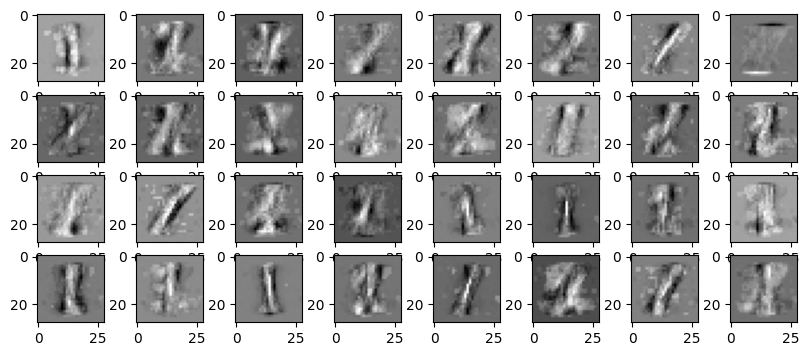

In [6]:
rbm = RBM(784, 32)

rbm.train(X_train[y_train == 1][:1000], epochs=20, learning_rate=0.1)
plt.plot(rbm.errors)

fig, axes = plt.subplots(4, 8, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(rbm.weights[i].reshape(28, 28), cmap='gray')


In [17]:
# evaluate the rbm
acc, rec, ssim = evaluate_rbm(rbm, X_test[y_test == 1])
print(f"Accuracy: {acc:.2f}, Recall {rec:.2f}, Structural similarity: {ssim:.2f}")


Accuracy: 0.98, Recall 0.90, Structural similarity: 0.93


ssim: 0.928195


Text(0.5, 1.0, 'Reconstructed')

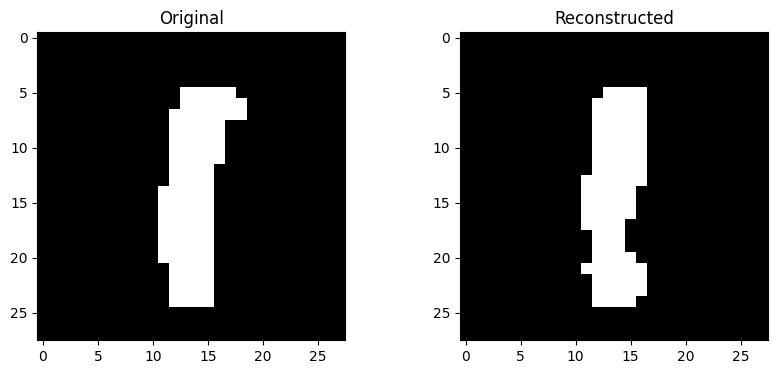

In [20]:
# print the original image and the reconstructed one
test_sample = X_test[y_test == 1][np.random.randint(0, X_test[y_test == 2].shape[0])]
reconstructed = rbm.reconstruct(test_sample)
reconstructed[reconstructed > 0.5] = 1
reconstructed[reconstructed < 0.5] = 0

ssim = structural_similarity(reconstructed, test_sample, data_range=1)
print(f'ssim: {ssim:2f}')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(test_sample.reshape(28, 28), cmap='gray')
axes[1].imshow(reconstructed.reshape(28, 28), cmap='gray')
# add labels 
axes[0].set_title('Original')
axes[1].set_title('Reconstructed')

## References

